<a href="https://colab.research.google.com/github/vijayareddy2002/intern_img_processing/blob/main/skin_cancer_lesion_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

lesion
a region in an organ or tissue which has suffered damage through injury or disease, such as a wound, ulcer, abscess, or tumour.

> Indented block



#AUTO KERAS
it experiments different models for a given data and tells which model suits to classify so it is best to use .

#Neural Architecture Search (NAS) because it searches for best fit architecture for the given data to train

1. This includes selecting the type of neural network layers such as Convolutional Neural Networks (CNNs), Recurrent Neural Networks (RNNs), and others, depending on the nature of the data and the task at hand.

 2. In the case of image classification tasks, AutoKeras is likely to explore architectures involving convolutional layers (CNNs) because CNNs are well-suited for processing grid-like data such as images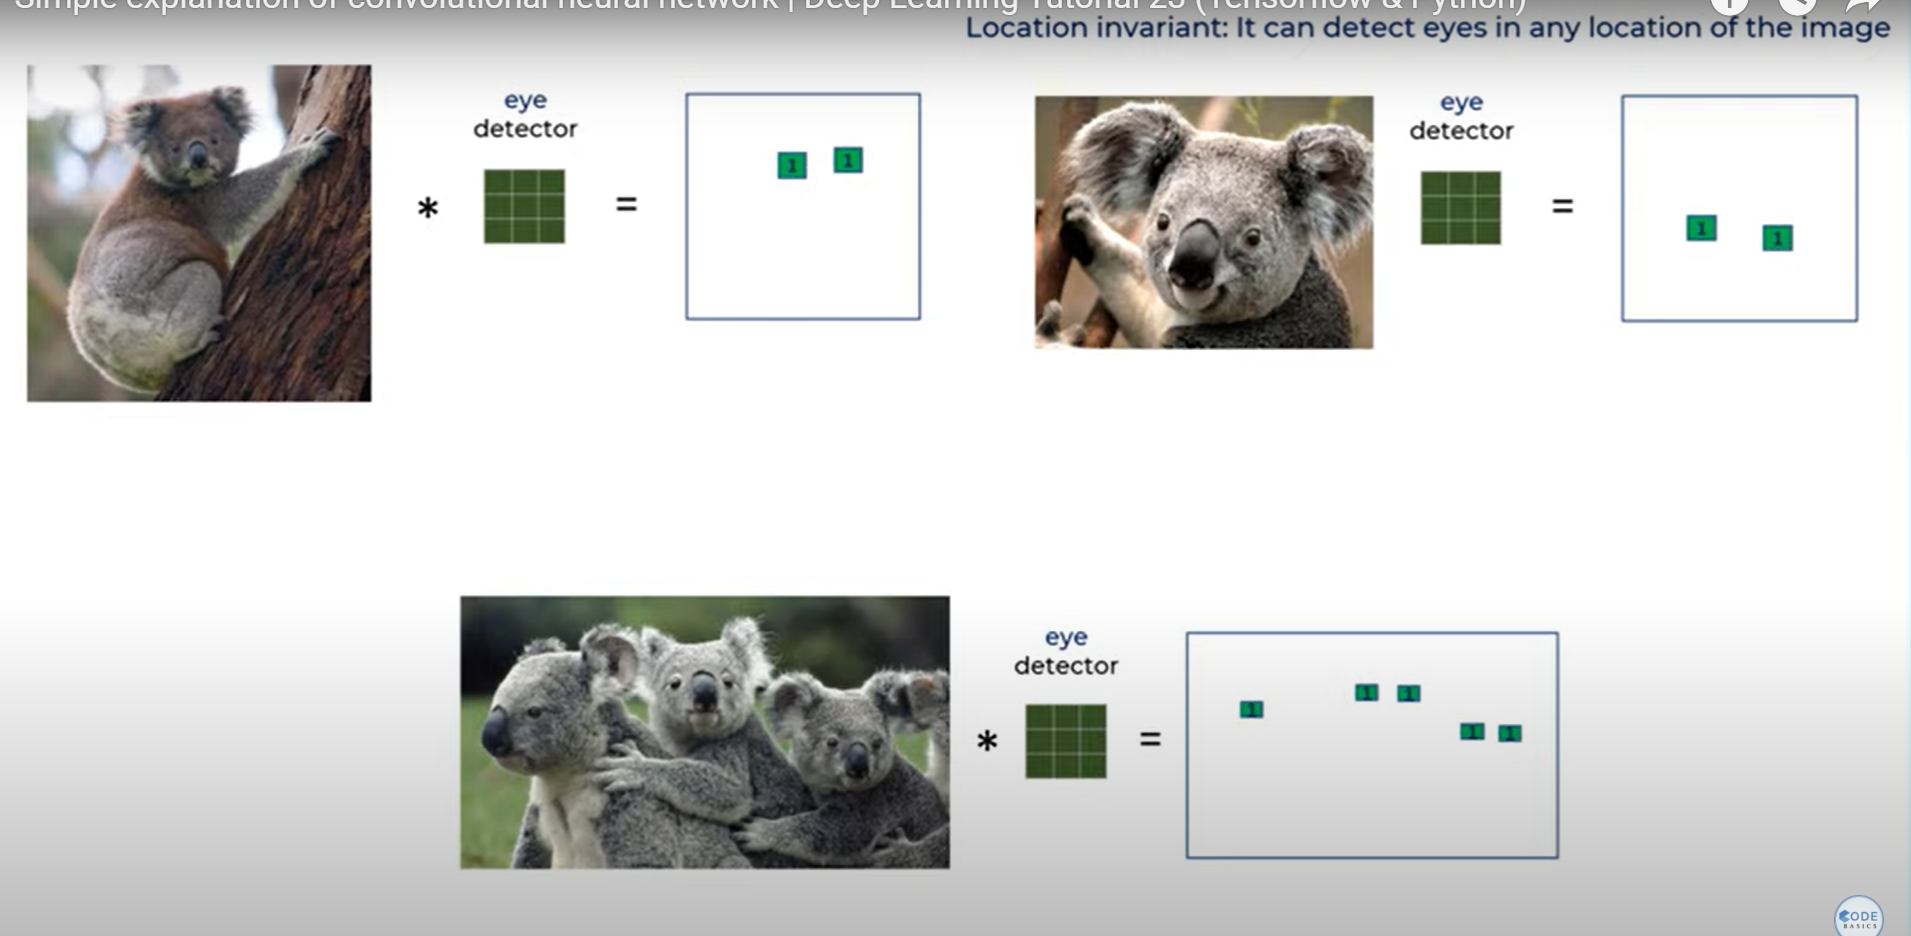

In [2]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
import keras

In [3]:
pip install --upgrade keras


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 7.4 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.0.2 which is incompatible.


In [4]:

"""
Skin cancer lesion classification using the HAM10000 dataset
Autokeras to find the best model.

Dataset link:
https://www.kaggle.com/kmader/skin-cancer-mnist-ham10000
The 7 classes of skin cancer lesions included in this dataset are:
Melanocytic nevi (nv)
Melanoma (mel)#overexposed to sun
Benign keratosis-like lesions (bkl) #similar to mole but develops to a cancer in young age.
Basal cell carcinoma (bcc)# begins in basal cells present  especially your head and neck.
Actinic keratoses (akiec)# due to defect in immune  system and exposed to sun over years
Vascular lesions (vas) #it develops a variety of tumours in head and neck
Dermatofibroma (df)#it occurs typically on the legs, elbows or chest of an adult, painless.
"""


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image

np.random.seed(42)


In [5]:
pip install autokeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.6/148.6 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.4/415.4 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 43.6 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.0.2
    Uninstalling keras-3.0.2:
      Successfully uninstalled keras-3.0.2


In [8]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from scipy import stats
from sklearn.preprocessing import LabelEncoder
import autokeras as ak


['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']
        lesion_id      image_id   dx    dx_type   age     sex  \
3697  HAM_0005218  ISIC_0028939   nv  follow_up  55.0  female   
7213  HAM_0007444  ISIC_0033989   nv      histo  50.0  female   
310   HAM_0002839  ISIC_0032280  bkl      histo  60.0  female   
4438  HAM_0005070  ISIC_0030863   nv  follow_up  55.0  female   
6087  HAM_0005969  ISIC_0028257   nv  follow_up  35.0    male   
3586  HAM_0001464  ISIC_0028319   nv  follow_up  70.0    male   
3733  HAM_0003513  ISIC_0030743   nv  follow_up  60.0    male   
718   HAM_0001359  ISIC_0028628  bkl      histo  75.0    male   
2090  HAM_0006006  ISIC_0028847  mel      histo  75.0    male   
3417  HAM_0002741  ISIC_0027939   nv  follow_up  45.0  female   

         localization  label  
3697  lower extremity      5  
7213  lower extremity      5  
310   lower extremity      2  
4438            trunk      5  
6087          abdomen      5  
3586            trunk      5  
3733  upper extr

<ipython-input-9-3f8c90d272c1>:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_age['age'], fit=stats.norm, color='red');


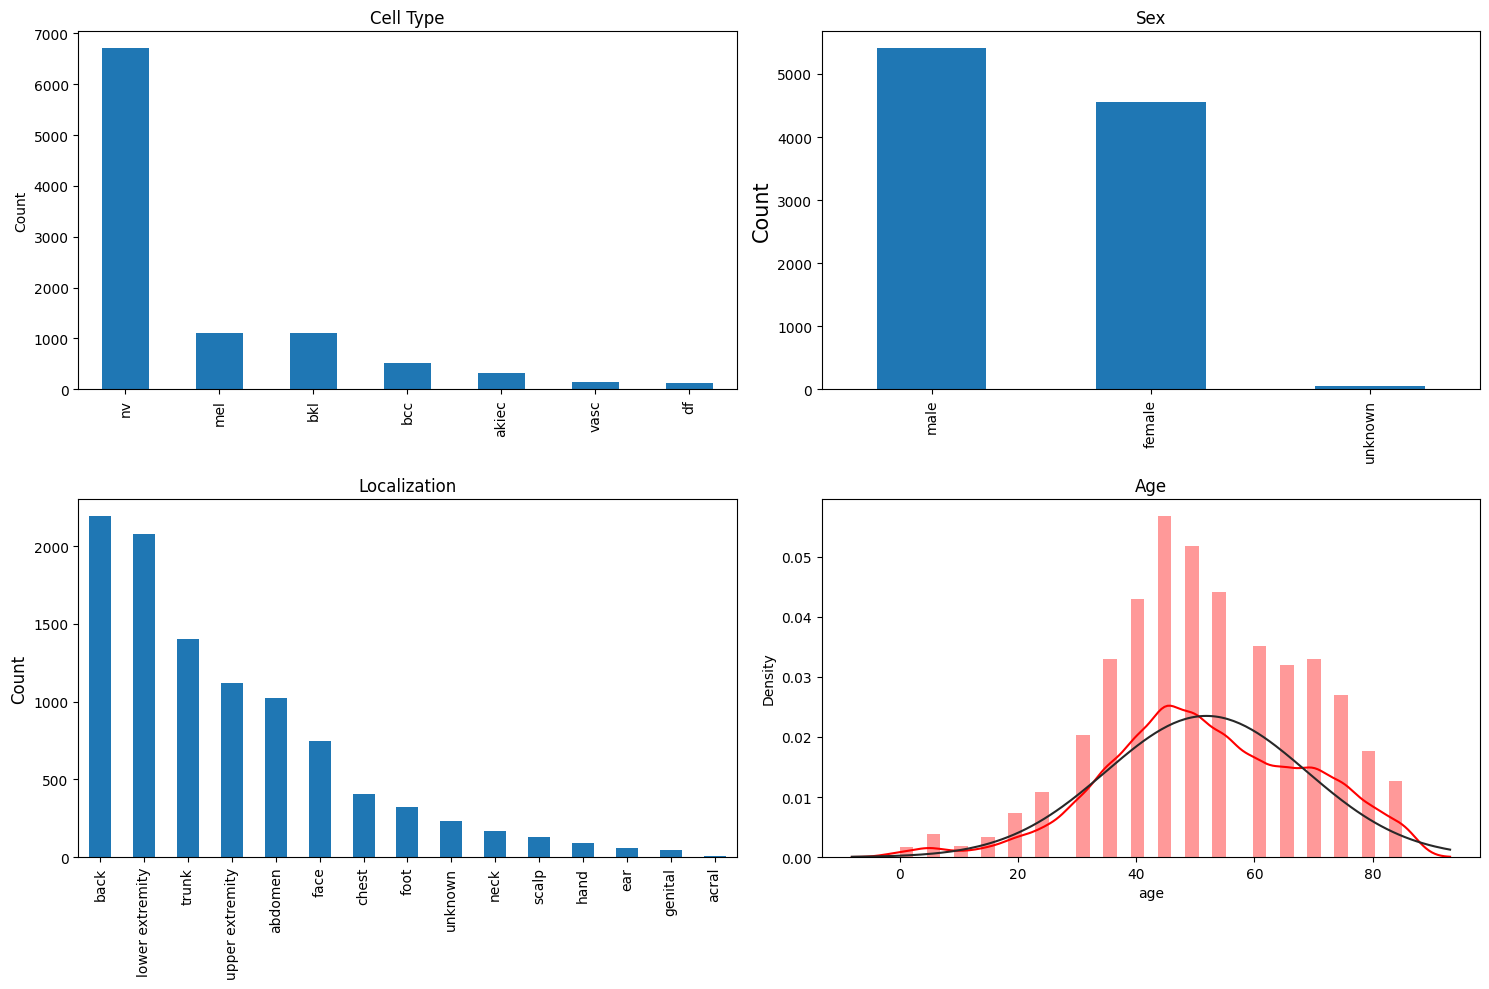

5    6705
4    1113
2    1099
1     514
0     327
6     142
3     115
Name: label, dtype: int64
0    100
1    100
2    100
3    100
4    100
5    100
6    100
Name: label, dtype: int64


In [9]:

skin_df = pd.read_csv('/content/HAM10000_metadata.csv')


SIZE=16

# label encoding to numeric values from text
le = LabelEncoder()
le.fit(skin_df['dx'])
LabelEncoder()
print(list(le.classes_))

skin_df['label'] = le.transform(skin_df["dx"])
print(skin_df.sample(10))


# Data distribution visualization
fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(221)
skin_df['dx'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Cell Type');

ax2 = fig.add_subplot(222)
skin_df['sex'].value_counts().plot(kind='bar', ax=ax2)
ax2.set_ylabel('Count', size=15)
ax2.set_title('Sex');

ax3 = fig.add_subplot(223)
skin_df['localization'].value_counts().plot(kind='bar')
ax3.set_ylabel('Count',size=12)
ax3.set_title('Localization')


ax4 = fig.add_subplot(224)
sample_age = skin_df[pd.notnull(skin_df['age'])]
sns.distplot(sample_age['age'], fit=stats.norm, color='red');
ax4.set_title('Age')

plt.tight_layout()
plt.show()

#______________________given some insights__________________

#here we are seeing like which label occured how many times exactly.
#inorder to experiment we should normalize otherwise it may be over trained...
#so we need to balance

# Distribution of data into various classes
from sklearn.utils import resample
print(skin_df['label'].value_counts())

#Balance data.
#Separate each classes, resample, and combine back into single dataframe

df_0 = skin_df[skin_df['label'] == 0]
df_1 = skin_df[skin_df['label'] == 1]
df_2 = skin_df[skin_df['label'] == 2]
df_3 = skin_df[skin_df['label'] == 3]
df_4 = skin_df[skin_df['label'] == 4]
df_5 = skin_df[skin_df['label'] == 5]
df_6 = skin_df[skin_df['label'] == 6]

n_samples=100
df_0_balanced = resample(df_0, replace=True, n_samples=n_samples, random_state=42)
df_1_balanced = resample(df_1, replace=True, n_samples=n_samples, random_state=42)
df_2_balanced = resample(df_2, replace=True, n_samples=n_samples, random_state=42)
df_3_balanced = resample(df_3, replace=True, n_samples=n_samples, random_state=42)
df_4_balanced = resample(df_4, replace=True, n_samples=n_samples, random_state=42)
df_5_balanced = resample(df_5, replace=True, n_samples=n_samples, random_state=42)
df_6_balanced = resample(df_6, replace=True, n_samples=n_samples, random_state=42)

skin_df_balanced = pd.concat([df_0_balanced, df_1_balanced,
                              df_2_balanced, df_3_balanced,
                              df_4_balanced, df_5_balanced, df_6_balanced])

#Now time to read images based on image ID from the CSV file
#This is the safest way to read images as it ensures the right image is read for the right ID
print(skin_df_balanced['label'].value_counts())





In [12]:
import os
from glob import glob

# Assuming your hamm_images_dataset1 folder is in the root directory of your Google Drive
drive_folder = '/content/drive/MyDrive/'

# Path to the hamm_images_dataset1 folder
dataset_path = os.path.join(drive_folder, 'HAM10000_images_part_1')

# Create a dictionary with image names as keys and paths as values
image_path = {os.path.splitext(os.path.basename(x))[0]: x
              for x in glob(os.path.join(dataset_path, '*.jpg'))}


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
#Define the path and add as a new column
skin_df_balanced['path'] = skin_df['image_id'].map(image_path.get)

In [13]:
skin_df_balanced = skin_df_balanced[skin_df_balanced['path'] != 'None']


In [ ]:
pip install numpy pillow


In [14]:
#Use the path to read images.
skin_df_balanced['image'] = skin_df_balanced['path'].map(lambda x: np.asarray(Image.open(x).resize((SIZE,SIZE)))) # now need to fillna with other images because you clubbed all other folders images.
n_samples = 5 #'n_samples' is the number of samples you want to display for each category

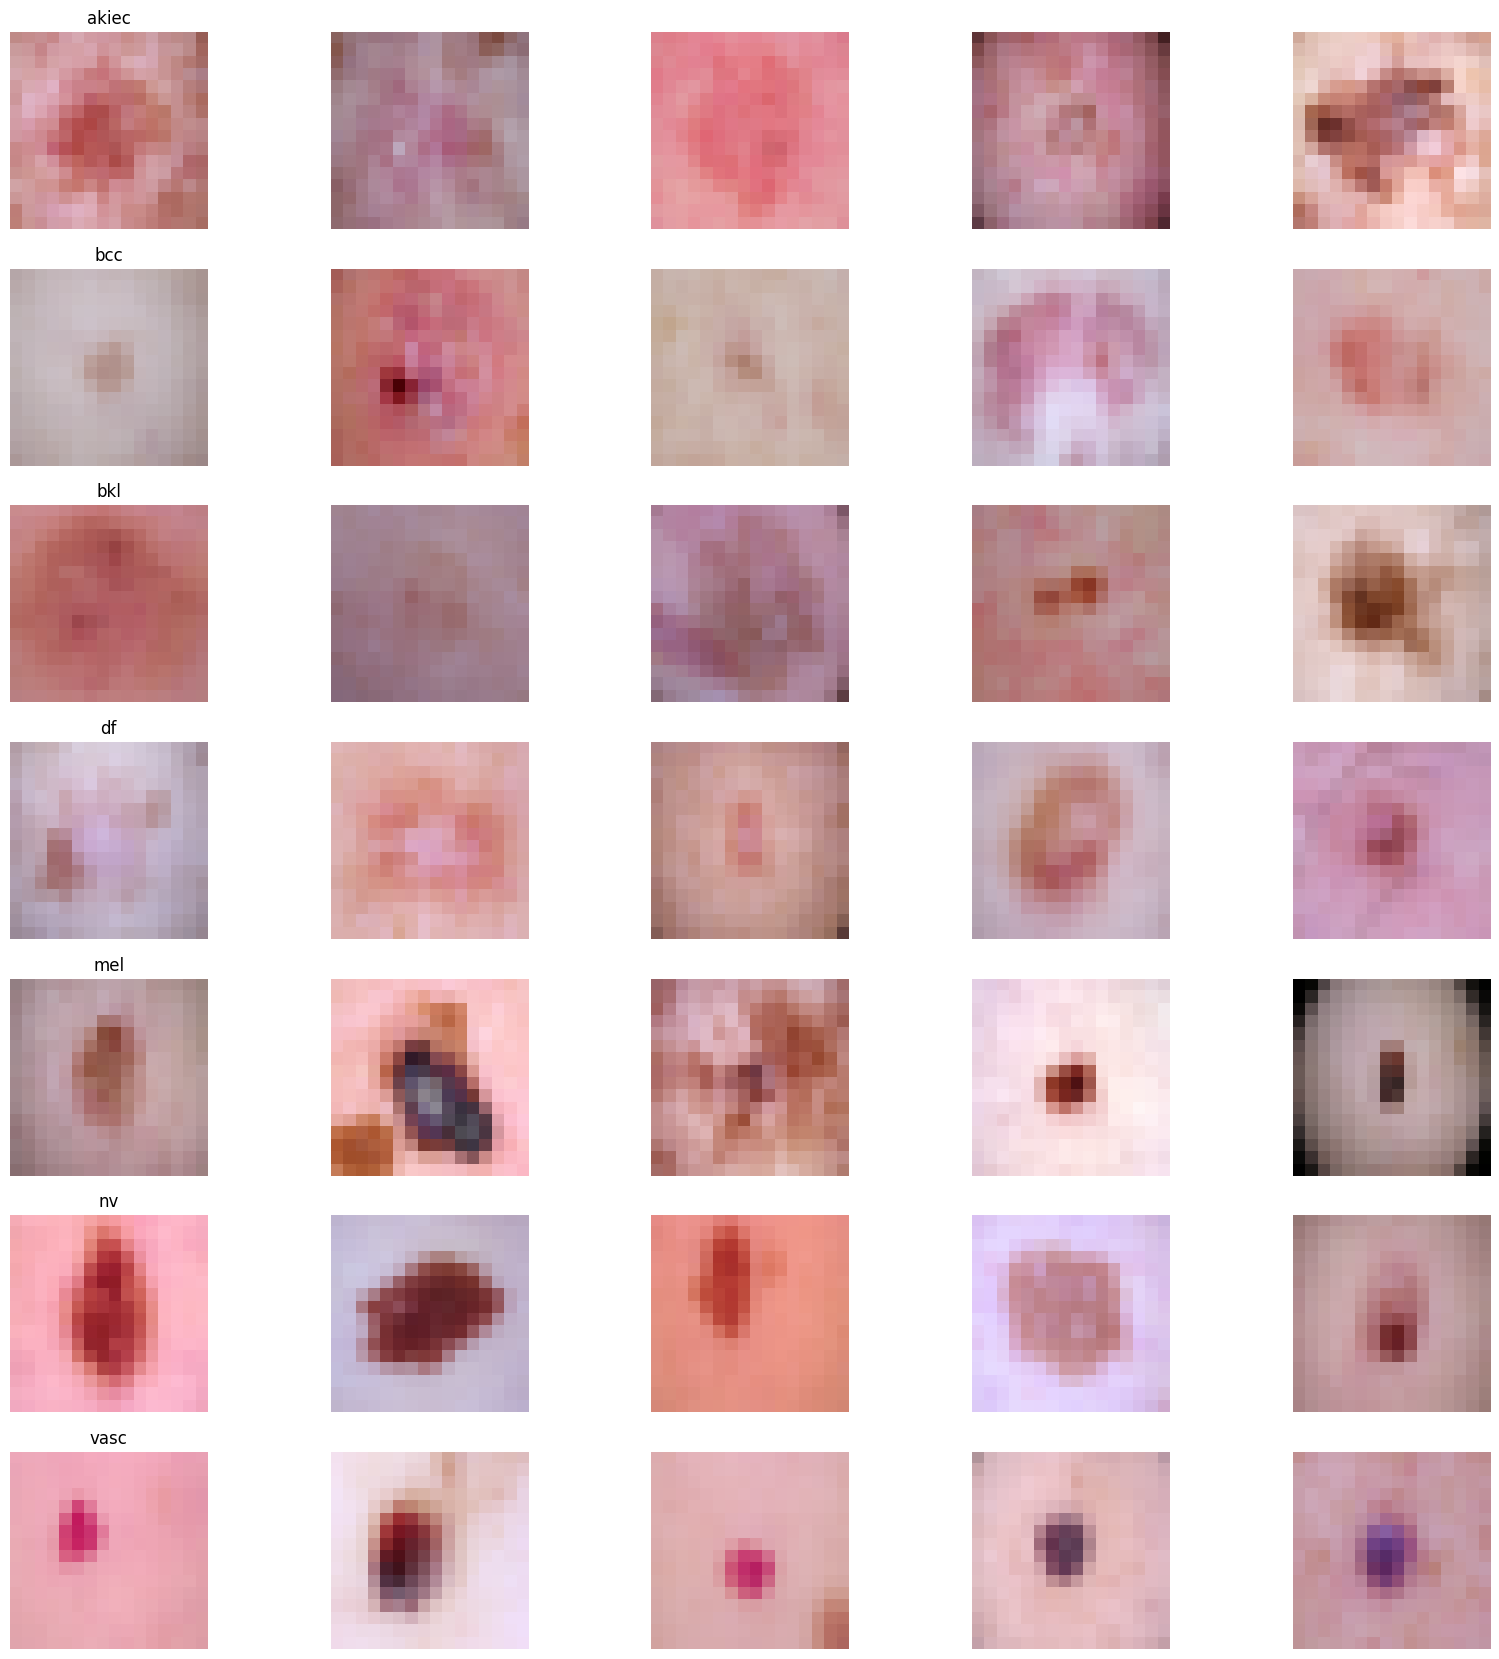

In [15]:
# Plot
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs,
                                         skin_df_balanced.sort_values(['dx']).groupby('dx')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')

In [16]:
#Convert dataframe column of images into numpy array
X = np.asarray(skin_df_balanced['image'].tolist())
X = X/255. # Scale values to 0-1. You can also used standardscaler or other scaling methods.
Y=skin_df_balanced['label'] #Assign label values to Y
Y_cat = to_categorical(Y, num_classes=7) #Convert to categorical as this is a multiclass classification problem

In [17]:
#Split to training and testing. Get a very small dataset for training as we will be
# fitting it to many potential models.
x_train_auto, x_test_auto, y_train_auto, y_test_auto = train_test_split(X, Y_cat, test_size=0.20, random_state=42)# 80 for training and 20 for testing

#Further split test data into smaller size to get a small test dataset and predict the labels for the small data set or else we can directly also test.
x_unused, x_valid, y_unused, y_valid = train_test_split(x_test_auto, y_test_auto, test_size=0.05, random_state=42)

#Define classifier for autokeras. Here we check 25 different models, each model 25 epochs
clf = ak.ImageClassifier(max_trials=25) #MaxTrials - max. number of keras models to try
clf.fit(x_train_auto, y_train_auto, epochs=60)


Trial 25 Complete [00h 00m 11s]
val_loss: 1.2338160276412964

Best val_loss So Far: 0.9855591058731079
Total elapsed time: 00h 37m 34s
Epoch 1/60
18/18 [==============================] - 1s 12ms/step - loss: 1.8576 - accuracy: 0.2393
Epoch 2/60
18/18 [==============================] - 0s 5ms/step - loss: 1.6800 - accuracy: 0.3357
Epoch 3/60
18/18 [==============================] - 0s 5ms/step - loss: 1.5428 - accuracy: 0.4232
Epoch 4/60
18/18 [==============================] - 0s 5ms/step - loss: 1.4106 - accuracy: 0.4696
Epoch 5/60
18/18 [==============================] - 0s 5ms/step - loss: 1.3231 - accuracy: 0.5161
Epoch 6/60
18/18 [==============================] - 0s 4ms/step - loss: 1.2103 - accuracy: 0.5536
Epoch 7/60
18/18 [==============================] - 0s 4ms/step - loss: 1.1429 - accuracy: 0.5732
Epoch 8/60
18/18 [==============================] - 0s 4ms/step - loss: 1.0999 - accuracy: 0.6125
Epoch 9/60
18/18 [==============================] - 0s 4ms/step - loss: 1.0246 -

In [19]:
#Evaluate the classifier on test data
_, acc = clf.evaluate(x_valid, y_valid)
print("Accuracy = ", (acc * 100.0), "%")

# get the final best performing model
model = clf.export_model()
print(model.summary())



1/1 [==============================] - 0s 246ms/step - loss: 2.5552 - accuracy: 0.5714
Accuracy =  57.14285969734192 %
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 16, 16, 3)]       0         
                                                                 
 cast_to_float32 (CastToFlo  (None, 16, 16, 3)         0         
 at32)                                                           
                                                                 
 normalization (Normalizati  (None, 16, 16, 3)         7         
 on)                                                             
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
        

In [ ]:
#tying withcnn model

['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']
        lesion_id      image_id   dx    dx_type   age     sex  \
1617  HAM_0007180  ISIC_0033272  mel      histo  65.0    male   
8128  HAM_0007195  ISIC_0031923   nv      histo  40.0  female   
2168  HAM_0001835  ISIC_0026652  mel      histo  65.0    male   
1090  HAM_0000465  ISIC_0030583  bkl  consensus  35.0  female   
7754  HAM_0001720  ISIC_0034010   nv      histo  45.0    male   
8071  HAM_0006333  ISIC_0024424   nv      histo  35.0    male   
7423  HAM_0004548  ISIC_0032832   nv      histo  45.0  female   
8984  HAM_0006526  ISIC_0026671   nv      histo  55.0    male   
2310  HAM_0003102  ISIC_0032389  mel      histo  65.0    male   
7256  HAM_0004260  ISIC_0025525   nv      histo  65.0    male   

         localization  label  
1617             face      4  
8128  lower extremity      5  
2168             back      4  
1090            trunk      2  
7754          abdomen      5  
8071            trunk      5  
7423  upper extr

<ipython-input-35-c94b215e6501>:73: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_age['age'], fit=stats.norm, color='red');


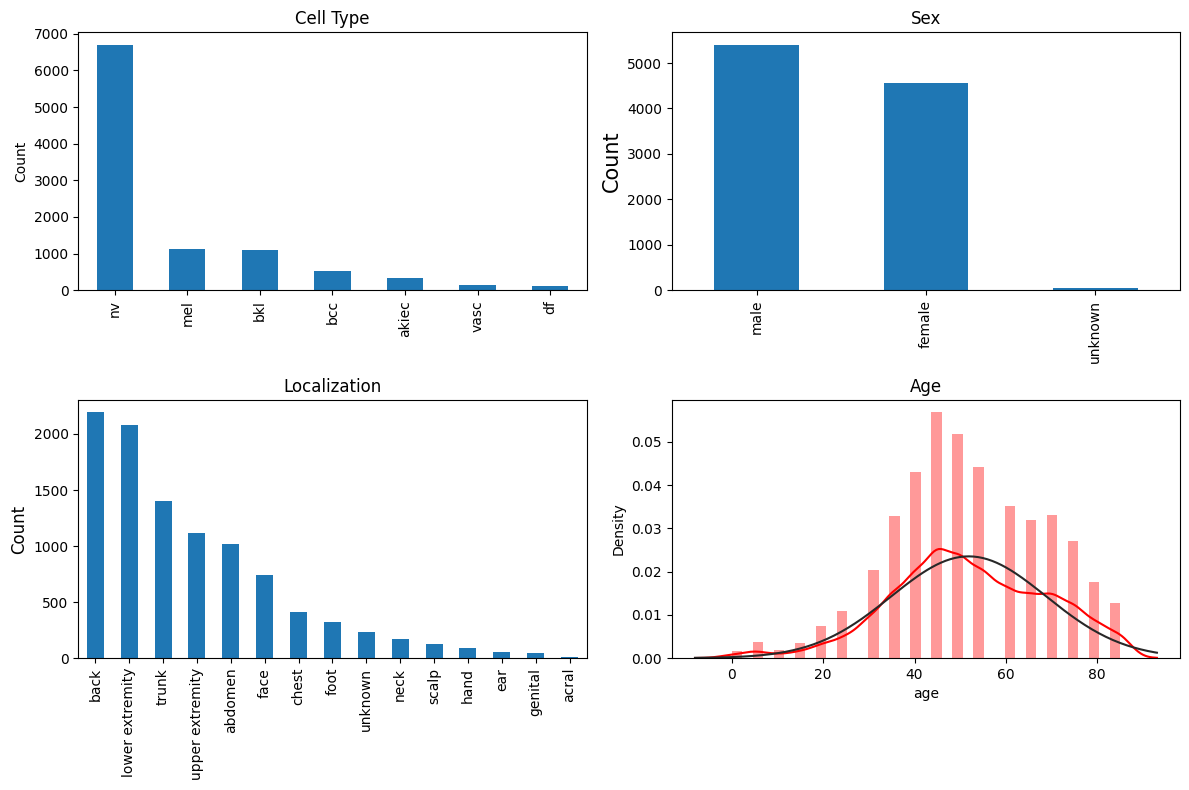

5    6705
4    1113
2    1099
1     514
0     327
6     142
3     115
Name: label, dtype: int64
0    500
1    500
2    500
3    500
4    500
5    500
6    500
Name: label, dtype: int64
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 30, 30, 256)       7168      
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 15, 15, 256)       0         
 ng2D)                                                           
                                                                 
 dropout_31 (Dropout)        (None, 15, 15, 256)       0         
                                                                 
 conv2d_36 (Conv2D)          (None, 13, 13, 128)       295040    
                                                                 
 max_pooling2d_31 (MaxPooli  (None, 6, 6, 128)         0         


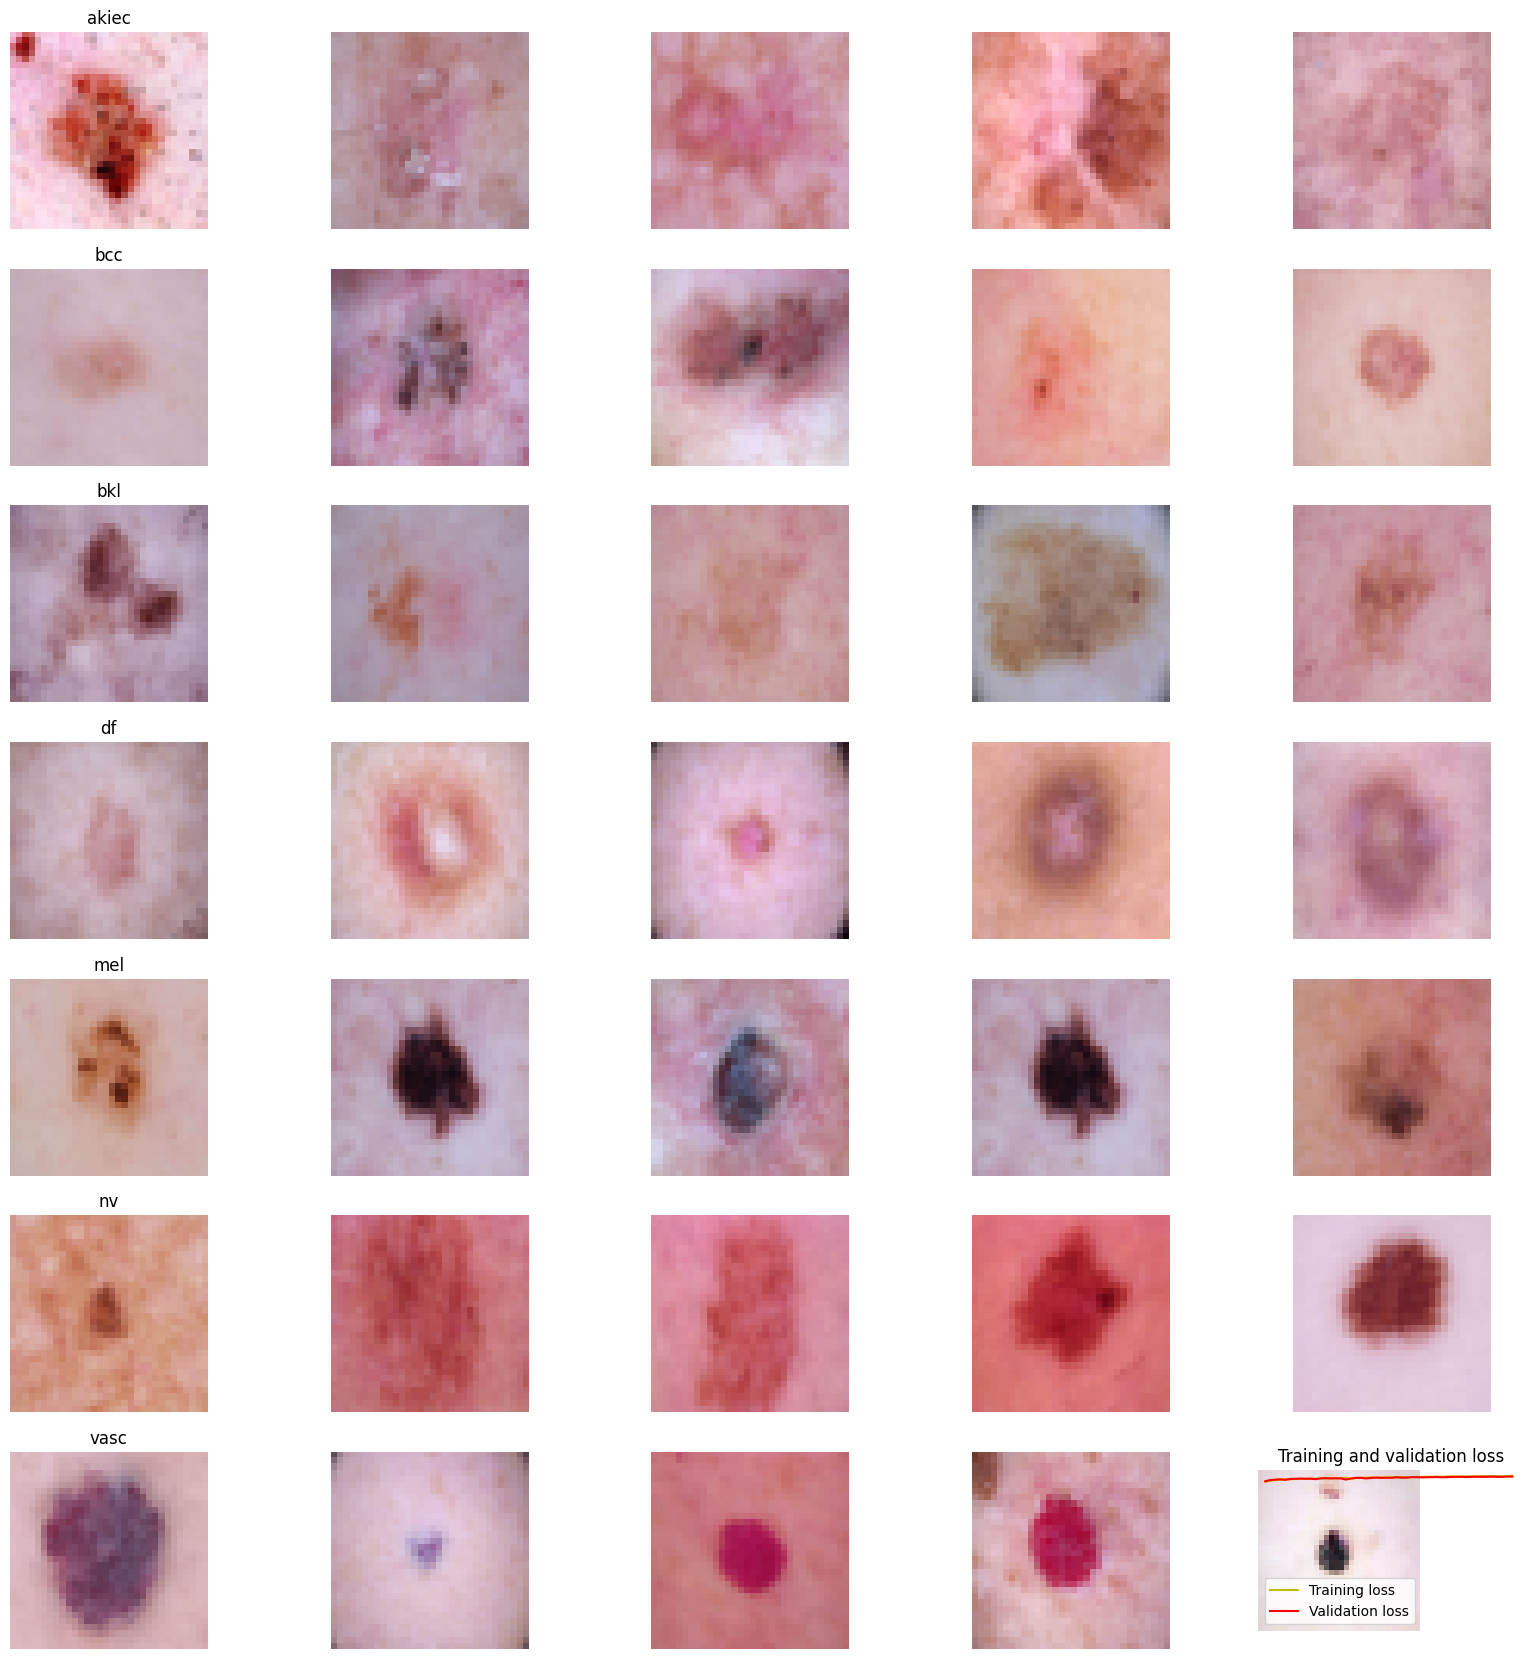

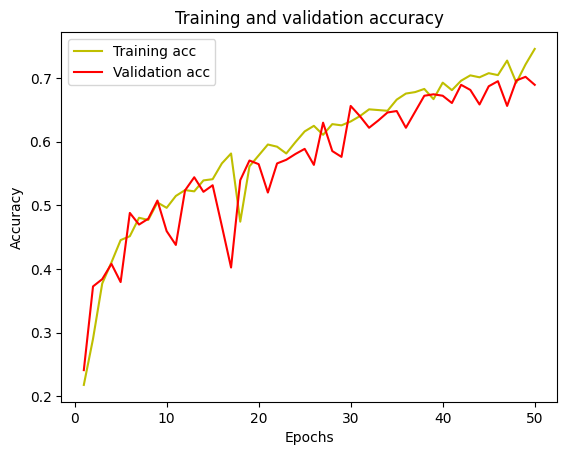

28/28 [==============================] - 0s 2ms/step


Text(45.722222222222214, 0.5, 'Fraction of incorrect predictions')

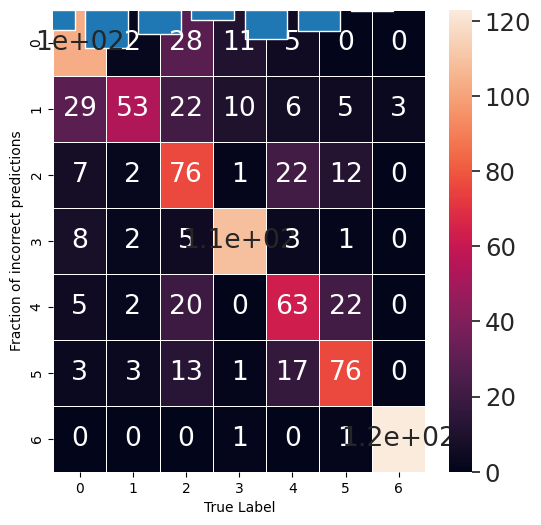

In [35]:

"""
The 7 classes of skin cancer lesions included in this dataset are:
Melanocytic nevi (nv)
Melanoma (mel)
Benign keratosis-like lesions (bkl)
Basal cell carcinoma (bcc)
Actinic keratoses (akiec)
Vascular lesions (vas)
Dermatofibroma (df)
"""


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image

np.random.seed(42)
from sklearn.metrics import confusion_matrix

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import LabelEncoder

skin_df = pd.read_csv('/content/HAM10000_metadata.csv')

SIZE=32

# label encoding to numeric values from text
le = LabelEncoder()
le.fit(skin_df['dx'])
LabelEncoder()
print(list(le.classes_))

skin_df['label'] = le.transform(skin_df["dx"])
print(skin_df.sample(10))


# Data distribution visualization
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(221)
skin_df['dx'].value_counts().plot(kind='bar', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Cell Type');

ax2 = fig.add_subplot(222)
skin_df['sex'].value_counts().plot(kind='bar', ax=ax2)
ax2.set_ylabel('Count', size=15)
ax2.set_title('Sex');

ax3 = fig.add_subplot(223)
skin_df['localization'].value_counts().plot(kind='bar')
ax3.set_ylabel('Count',size=12)
ax3.set_title('Localization')

ax4 = fig.add_subplot(224)
sample_age = skin_df[pd.notnull(skin_df['age'])]
sns.distplot(sample_age['age'], fit=stats.norm, color='red');
ax4.set_title('Age')

plt.tight_layout()
plt.show()


# Distribution of data into various classes
from sklearn.utils import resample
print(skin_df['label'].value_counts())

#Balance data.
# Many ways to balance data... you can also try assigning weights during model.fit
#Separate each classes, resample, and combine back into single dataframe

df_0 = skin_df[skin_df['label'] == 0]
df_1 = skin_df[skin_df['label'] == 1]
df_2 = skin_df[skin_df['label'] == 2]
df_3 = skin_df[skin_df['label'] == 3]
df_4 = skin_df[skin_df['label'] == 4]
df_5 = skin_df[skin_df['label'] == 5]
df_6 = skin_df[skin_df['label'] == 6]

n_samples=500
df_0_balanced = resample(df_0, replace=True, n_samples=n_samples, random_state=42)
df_1_balanced = resample(df_1, replace=True, n_samples=n_samples, random_state=42)
df_2_balanced = resample(df_2, replace=True, n_samples=n_samples, random_state=42)
df_3_balanced = resample(df_3, replace=True, n_samples=n_samples, random_state=42)
df_4_balanced = resample(df_4, replace=True, n_samples=n_samples, random_state=42)
df_5_balanced = resample(df_5, replace=True, n_samples=n_samples, random_state=42)
df_6_balanced = resample(df_6, replace=True, n_samples=n_samples, random_state=42)

#Combined back to a single dataframe
skin_df_balanced = pd.concat([df_0_balanced, df_1_balanced,
                              df_2_balanced, df_3_balanced,
                              df_4_balanced, df_5_balanced, df_6_balanced])

#Check the distribution. All classes should be balanced now.
print(skin_df_balanced['label'].value_counts())
import os
from glob import glob

# Assuming your hamm_images_dataset1 folder is in the root directory of your Google Drive
drive_folder = '/content/drive/MyDrive/'

# Path to the hamm_images_dataset1 folder
dataset_path = os.path.join(drive_folder, 'HAM10000_images_part_1')

# Create a dictionary with image names as keys and paths as values
image_path = {os.path.splitext(os.path.basename(x))[0]: x
              for x in glob(os.path.join(dataset_path, '*.jpg'))}

#Define the path and add as a new column
skin_df_balanced['path'] = skin_df['image_id'].map(image_path.get)
#Use the path to read images.
skin_df_balanced['image'] = skin_df_balanced['path'].map(lambda x: np.asarray(Image.open(x).resize((SIZE,SIZE))))


n_samples = 5  # number of samples for plotting
# Plotting
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs,
                                         skin_df_balanced.sort_values(['dx']).groupby('dx')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')

#Convert dataframe column of images into numpy array
X = np.asarray(skin_df_balanced['image'].tolist())
X = X/255.  # Scale values to 0-1. You can also used standardscaler or other scaling methods.
Y=skin_df_balanced['label']  #Assign label values to Y
Y_cat = to_categorical(Y, num_classes=7) #Convert to categorical as this is a multiclass classification problem
#Split to training and testing
x_train, x_test, y_train, y_test = train_test_split(X, Y_cat, test_size=0.25, random_state=42)

#Define the model.
#I've used autokeras to find out the best model for this problem.
#You can also load pretrained networks such as mobilenet or VGG16

num_classes = 7

model = Sequential()
#256 filters are applied and kernel size is 3*3 inorder to perform convolutional operation and profuces feature map
model.add(Conv2D(256, (3, 3), activation="relu", input_shape=(SIZE, SIZE, 3)))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3),activation='relu'))
#model.add(BatchNormalization())
#max polling is used to reduce size to 2*2 matrix
model.add(MaxPool2D(pool_size=(2, 2)))
#During training, 30% of the neurons in the previous layer will be randomly set to zero in each iteration. This introduces a form of noise, preventing the model from becoming too reliant on specific neurons and improving generalization.
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3),activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
#_______ upto know we obtained or extracted features
#we flatten features obtained
#The input format given to fully connected dense layers is typically one-dimensional. When transitioning from convolutional or pooling layers to fully connected layers in a neural network architecture, a flattening step is often employed to convert the 3D tensor output of the previous layers into a 1D vector.
model.add(Flatten())

#classification - we use dense layer
model.add(Dense(32))
model.add(Dense(7, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['acc'])


# Train
#You can also use generator to use augmentation during training.

batch_size = 16
epochs = 50

history = model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size = batch_size,
    validation_data=(x_test, y_test),
    verbose=2)

score = model.evaluate(x_test, y_test)
print('Test accuracy:', score[1])


#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Prediction on test data
y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors
y_pred_classes = np.argmax(y_pred, axis = 1)
# Convert test data to one hot vectors
y_true = np.argmax(y_test, axis = 1)

#Print confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

fig, ax = plt.subplots(figsize=(6,6))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)


#PLot fractional incorrect misclassifications
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
plt.bar(np.arange(7), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')



